<a href="https://colab.research.google.com/github/TienNguyen0712/student-alcohol-consumption-data-mining/blob/main/notebooks/05_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 **Problem Formulation (Định nghĩa mục tiêu)**

**Mục tiêu:** Mục tiêu của bài toán là xây dựng một mô hình phân cụm nhằm phân chia thành các nhóm học sih dựa trên các đặc trên các đặc trưng về thời gian học tập, sử dụng cồn, số buổi vắng học

**Mục tiêu phân cụm:** Xác định các yếu tố có thể ảnh hưởng đến điểm số, phân cụm nhóm học sinh để có thể đánh giá các đặc điểm của từng nhóm

**Mô hình phân cụm được sử dụng:**

- K-Mean
- Hierarchical Clustering

## 🔎 **Data Preparation (Chuẩn bị dữ liệu phân cụm)**

**Các đặc trưng được lựa chọn cho mô hình phân cụm**

- **Thông tin cá nhân:** `sex`, `Pstatus`
- **Thông tin học tập:** `guardian`
- **Thông tin thời gian:** `studytime`, `failures`
- **Thông tin sinh hoạt:** `activities`, `nursery`, `famrel`
- **Thông tin sức khỏe tinh thần:** `freetime`, `goout`, `Dalc`, `Walc`, `health`, `absences`
- **Thông tin điểm số:** `G1`, `G2`, `G3`



In [19]:
col_selects = ['sex', 'Pstatus', 'guardian', 'studytime', 'failures', 'activities',
               'nursery', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
               'absences', 'G1', 'G2', 'G3']

In [20]:
import pandas as pd

student_merge = pd.read_csv('student_merge.csv')
student_merge.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,traveltime,studytime,failures,famrel,goout,Dalc,Walc,health,absences,freetime
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,2.0,4.0,0.5,3.0,2.0,1.0,1.0,1.0,4.0,1.0
1,GP,F,15,R,GT3,T,1,1,other,other,...,3.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,2.0,5.0
2,GP,F,15,R,GT3,T,1,1,other,other,...,1.0,2.0,1.0,3.0,4.0,2.0,4.0,5.0,2.0,3.0
3,GP,F,15,R,GT3,T,2,2,at_home,other,...,1.0,1.0,0.0,4.0,1.0,1.0,1.0,2.0,8.0,3.0
4,GP,F,15,R,GT3,T,2,4,services,health,...,1.0,3.0,0.0,4.0,2.0,1.0,1.0,5.0,2.0,3.0


In [21]:
X = student_merge[col_selects]

## 📐 **Optimal K (Tối ưu cụm K)**

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

X_processed = preprocess.fit_transform(X)


In [84]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K = range(2, 11)
sil_scores = []

X_dense = X_processed

for k in K:
    agg = AgglomerativeClustering(
        n_clusters=k,
        linkage="ward"
    )
    labels_a = agg.fit_predict(X_dense)
    score = silhouette_score(X_dense, labels_a)
    sil_scores.append(score)


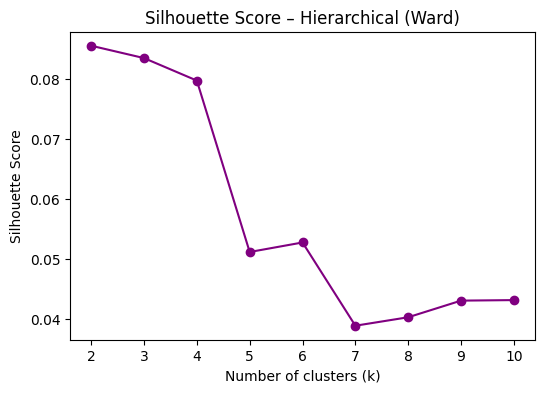

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(K, sil_scores, marker="o", color="purple")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score – Hierarchical (Ward)")
plt.show()

In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 11)
inertias = []
sil_scores = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels_k = km.fit_predict(X_processed)
    km.fit(X_processed)
    score = silhouette_score(X_processed, labels_k)
    sil_scores.append(score)
    inertias.append(km.inertia_)

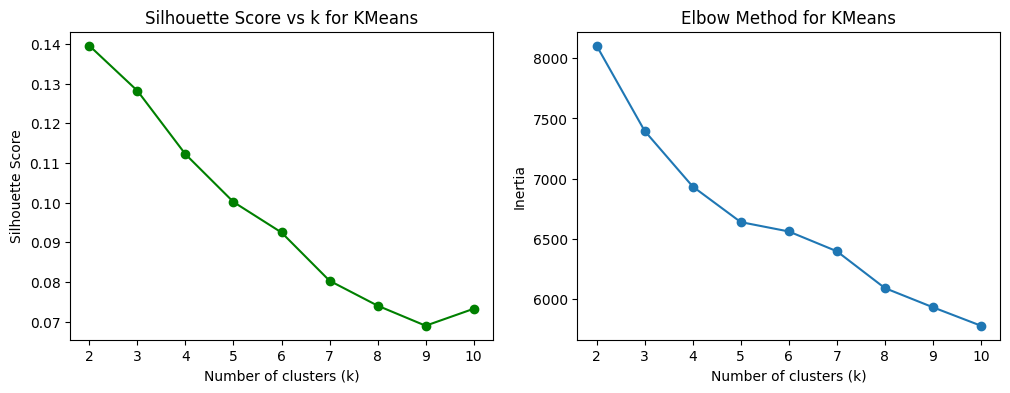

In [90]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(K, sil_scores, marker="o", color="green")
axes[0].set_title("Silhouette Score vs k for KMeans")
axes[0].set_xlabel("Number of clusters (k)")
axes[0].set_ylabel("Silhouette Score")

axes[1].plot(K, inertias, marker="o")
axes[1].set_title("Elbow Method for KMeans")
axes[1].set_xlabel("Number of clusters (k)")
axes[1].set_ylabel("Inertia")

plt.show()

## 🤖 **Clustering Model (Mô hình phân cụm)**

In [36]:
from sklearn.cluster import AgglomerativeClustering

hclust = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"
)

labels_h = hclust.fit_predict(X_processed)
student_merge["cluster_h"] = labels_h


In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_processed)

feature_names = preprocess.get_feature_names_out()

student_merge["cluster"] = labels

In [41]:
from sklearn.metrics import silhouette_score

print("KMeans:", silhouette_score(X_processed, labels))
print("Hierarchical:", silhouette_score(X_processed, labels_h))


KMeans: 0.12820824643430753
Hierarchical: 0.08343680099016355


## 📊 **Visualization (Trực quan hóa)**

In [45]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_processed)

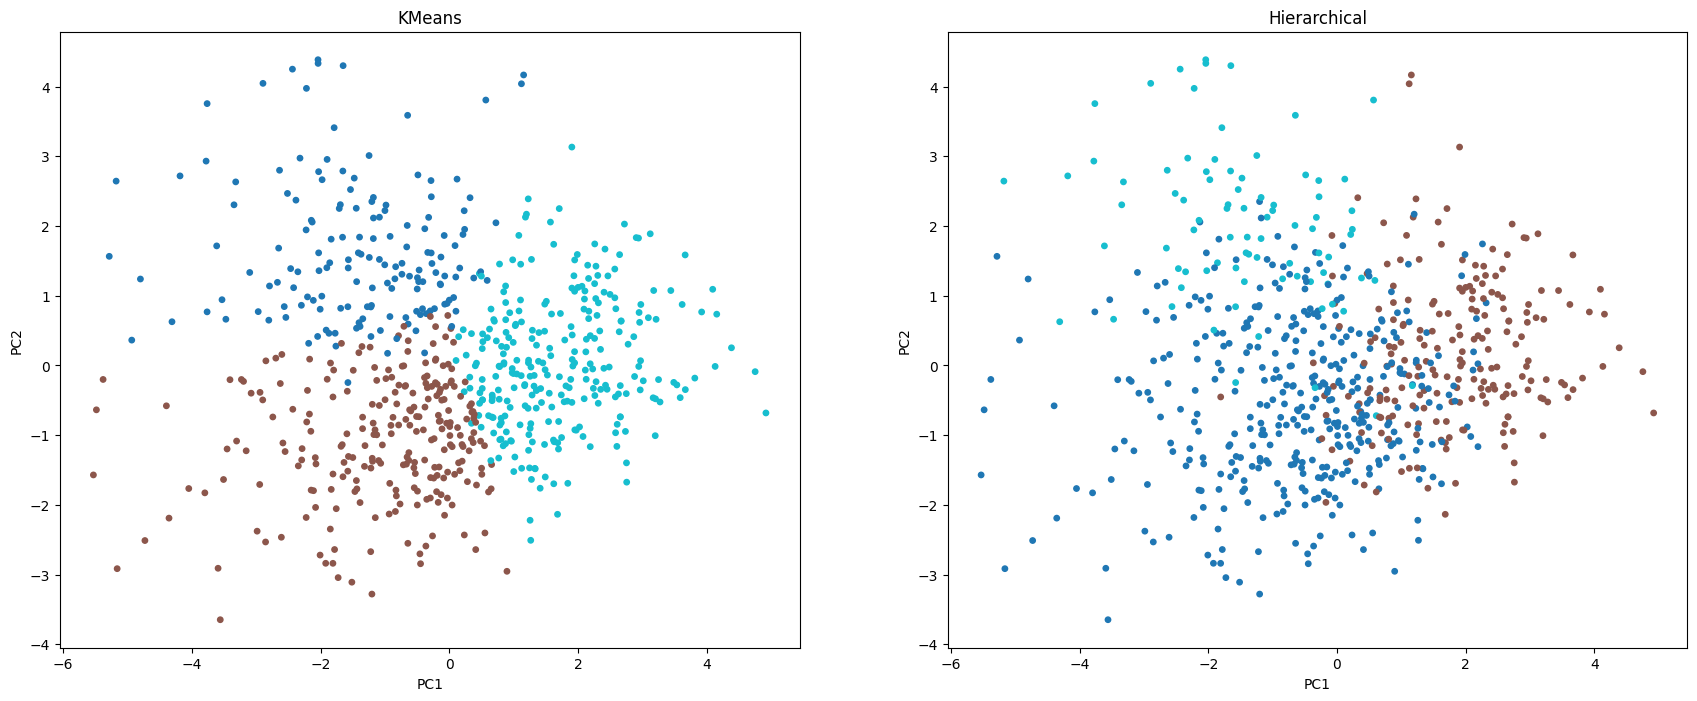

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(21, 8))

axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap="tab10", s=15)
axes[0].set_title("KMeans")

axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_h, cmap="tab10", s=15)
axes[1].set_title("Hierarchical")

for ax in axes:
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.show()


## 🧬 **Cluster Analysis (Phân tích cụm)**

In [32]:
for col in cat_cols:
    print(student_merge.groupby("cluster")[col].value_counts(normalize=True))


cluster  sex
0        M      0.735849
         F      0.264151
1        F      0.724696
         M      0.275304
2        F      0.634058
         M      0.365942
Name: proportion, dtype: float64
cluster  Pstatus
0        T          0.918239
         A          0.081761
1        T          0.858300
         A          0.141700
2        T          0.873188
         A          0.126812
Name: proportion, dtype: float64
cluster  guardian
0        mother      0.660377
         father      0.245283
         other       0.094340
1        mother      0.700405
         father      0.182186
         other       0.117409
2        mother      0.684783
         father      0.268116
         other       0.047101
Name: proportion, dtype: float64
cluster  activities
0        yes           0.534591
         no            0.465409
1        no            0.587045
         yes           0.412955
2        yes           0.525362
         no            0.474638
Name: proportion, dtype: float64
cluster  nurse

In [31]:
student_merge.groupby("cluster")[num_cols].mean()


,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
cluster,,,,,,,,,,,,
0,1.606918,0.389937,3.864780,3.581761,3.965409,2.669811,3.918239,3.959119,7.566038,10.08805,10.160377,10.270440
1,1.823887,0.524291,3.836032,3.117409,2.981781,1.135628,1.783401,3.481781,5.773279,9.00000,8.787449,8.619433
2,2.199275,0.047101,4.070652,3.021739,2.894928,1.143116,1.759058,3.344203,4.170290,13.40942,13.675725,14.096014


## 📝 **Conclusion (Kết luận)**